## Fake News Detection Using Logistic Regression

C:\Users\HP\AppData\Local\Temp\ipykernel_2900\2735649416.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class'] = 0
C:\Users\HP\AppData\Local\Temp\ipykernel_2900\2735649416.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class'] = 1


Accuracy of the model:  0.9863636363636363

Classification Report: 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5901
           1       0.98      0.99      0.99      5319

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



Confusion Matrix Plot : 


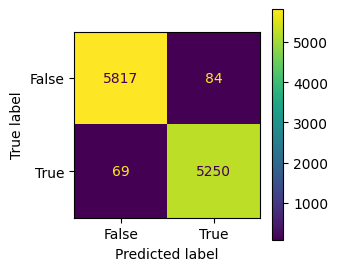



Enter the news : 
The Pentagon is considering a Boeing proposal to supply Ukraine with cheap, small precision bombs fitted on to abundantly available rockets, allowing Kyiv to strike far behind Russian lines, according to a Reuters report. US and allied military inventories are shrinking, and Ukraine faces an increasing need for more sophisticated weapons as the war drags on. Boeing's proposed system, dubbed Ground-Launched Small Diameter Bomb (GLSDB), is one of about a half-dozen plans for getting new munitions into production for Ukraine and America's eastern European allies, industry sources told the news agency. GLSDB could be delivered as early as spring 2023, according to a document reviewed by Reuters and three people familiar with the plan. It combines the GBU-39 Small Diameter Bomb (SDB) with the M26 rocket motor, both of which are common in US inventories. Although a handful of GLSDB units have already been made, there are many logistical obstacles to formal procurement. Th

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

data_fake = pd.read_csv("Fake.csv")
data_true = pd.read_csv("True.csv")
+
data_fake["class"] = 0
data_true["class"] = 1
data_fake.shape, data_true.shape

data_fake_manual_testing = data_fake.tail(10)
for i in range(23480, 23470, -1):
    data_fake.drop([i], axis = 0, inplace = True)
    
data_true_manual_testing = data_true.tail(10)
for i in range(21416, 21406, -1):
    data_true.drop([i], axis = 0, inplace = True)
    
data_fake_manual_testing['class'] = 0
data_true_manual_testing['class'] = 1

data_merge = pd.concat([data_fake, data_true], axis = 0)
data_merge.columns
data = data_merge.drop(['title','subject','date'], axis=1)
data.isnull().sum()

data = data.sample(frac = 1)
data.head()
data.reset_index(inplace = True)
data.drop(['index'], axis=1, inplace=True)
data.head()
data.columns
data.head()


def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ",text)
    text = re.sub('https?://S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

data['text'] = data['text'].apply(wordopt)
x = data['text']
y = data['class']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 123)

from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train, y_train)

pred_lr = LR.predict(xv_test)
print("Accuracy of the model: ",LR.score(xv_test, y_test))
print("\nClassification Report: \n")
print(classification_report(y_test,pred_lr))

# Confusion matrix of Results from Logistic Regression
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, LR.predict(xv_test))
  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])
  
print("\n\nConfusion Matrix Plot : ")
plt.rcParams['figure.figsize'] = [3, 3]
cm_display.plot()
plt.show()




def output_lable(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "Not a Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    
    return print("\n\nOutput:\nLogistic Regression Prediction: {}".format(output_lable(pred_LR[0])))

news = str(input("\n\nEnter the news : \n"))
manual_testing(news)